## Q2 analysis: 

### Question: Given the time period, which company has the most growth on stock price, and which company has the most decline on stock price?

### Most Growth:
X-axis: Represents time, specifically the quarters from Q1 2018 to Q2 2023.
Y-axis: Represents the stock price.
Lines: Each line represents one of the top 5 tickers with the greatest growth rate. The growth rate is calculated as the difference between the final and initial prices, divided by the initial price.
Annotations: The chart includes annotations (labels) at the end of each line, displaying the ticker name. This makes it easy to identify each line
Legend: The legend outside the plot area helps identify which color line corresponds to each ticker.
This chart provides a visual representation of the stocks that have experienced the most growth over the given period. We can easily compare their trends and see how they performed relative to one another.
We can see that from 2018 Q1 to 2023 Q2, NVIDIA Corporation, Tesla, Inc., and Apple Inc. has the most growth on stock price. Followed by Advanced Micro Devices, Inc. and Marathon Digital Holdings, Inc.. 

### Most Decline:
X-axis: Similar to the previous chart, it represents the quarters from Q1 2018 to Q2 2023.
Y-axis: Represents the stock price.
Lines: Each line represents one of the bottom 5 tickers with the greatest decline rate. The decline rate is calculated in the same way as the growth rate but focuses on negative values, indicating a loss in stock price.
Annotations: Annotations at the end of each line display the ticker name.
Legend: Similar to the previous chart, the legend helps identify which line corresponds to each ticker.
This chart provides insight into the stocks that have declined the most during the given time frame. It helps identify and analyze the companies that may be struggling or facing challenges in their respective markets.
And from the second chart, it shows that from 2018 Q1 to 2023 Q2, American Airlines Group Inc., JetBlue Airways Corporation, DISH Network Corporation, AMC Entertainment Holdings, Inc.	and Lloyds Banking Group plc has the most drop on stock price.

### Why is it important to know the growth and decline of stock price?
Investment Opportunities: Identifying stocks with high growth rates can highlight potential investment opportunities. Conversely, knowing the stocks in decline can signal which investments to avoid or reconsider.


Company Performance Analysis: Growth and decline metrics can be used to assess the performance of a company's management. For example, a company with consistently declining stock prices might be mismanaged or facing significant challenges that it's failing to address effectively.

Risk Management: For portfolio managers, understanding which stocks are growing and which are declining is crucial for risk management. They might decide to balance high-risk, high-growth stocks with more stable, low-growth ones.

Mergers & Acquisitions: Companies looking for acquisition targets might focus on declining tickers as potential buyout candidates. Similarly, growing companies might be viewed as potential threats or partners.


## Q3 analysis:
### Question: What is the average age of officers of these companies?
We first get data from Yahoo Finance about company background information. With 30 companies and all of their officers' age listed. 
Then we generated a box chart with the information including: 

Company Names on the x-axis: Each box in the plot corresponds to one company from the top_30_tickers. The companies are arranged in increasing order of their officers' mean ages. The company on the far left has the youngest average officer age, while the company on the far right has the oldest.

Officer Age on the y-axis: This represents the age of officers. The range of this axis shows the youngest and oldest officers among all the companies.

Boxes: For each company:

The bottom of the box represents the age of the youngest 25% of officers (1st quartile or Q1).
The top of the box represents the age of the youngest 75% of officers (3rd quartile or Q3).
The line inside the box is the median age of officers for that company.
The height of the box (IQR) shows the age range for the middle 50% of the officers.
Whiskers: These are the lines extending above and below the box.

The top whisker extends to the oldest officer's age within 1.5 times the IQR from the 3rd quartile.
The bottom whisker extends to the youngest officer's age within 1.5 times the IQR from the 1st quartile.
Red Dots: These represent the mean (average) age of officers for each company. By comparing the position of the red dot to the median line, you can tell if the average age is above or below the median.

Outliers: Dots above or below the whiskers, these represent officer ages that are unusually high or low compared to the rest of the officers for that company.

For more direct information, we also developed a bar chart to show the average age of officers of these companies. And we found that the Mean Age is 53.07, Median Age is 55.00 and Mode Age is 55. 

### Why is it important to know the average age of officers of these companies?
Diversity of Thought: Age can influence perspectives and decision-making processes. A mix of age groups among leadership might bring diverse viewpoints, combining both experience and fresh ideas, leading to a balanced approach to business strategy.

Succession Planning: An understanding of the age demographics of company officers can help shareholders and the board plan for the future. If many top executives are nearing retirement age, there may be a need for succession planning and leadership development initiatives.

Company Culture & Adaptability: Younger leadership may be more receptive to newer technologies, trends, or innovative business models. On the other hand, seasoned leaders might bring decades of industry knowledge and connections. Understanding the age mix can give insights into the company's adaptability and cultural leanings.

Investment Decisions: Some investors may look at the average age of company officers as a factor when considering the potential for innovation or stability in a company. For example, tech startups with younger leadership might be perceived as more innovative but potentially less stable than established companies with older leadership.



In [41]:
# import Dependencies
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
top_30_tickers =[
    "PLTR", "TLRY", "TSLA", "LCID", "AAPL", "NIO", 
    "AMD", "AMZN", "RIVN", "F", "BAC", "T",
    "MPW", "NVDA", "AMC", "INTC", "ITUB", "JNJ", 
    "VALE", "SOFI", "MARA", "DDOG", "LYG", "DISH",
    "AAL", "OPEN", "SWN", "PFE", "HPE", "JBLU"
]

# Q2: Given the time period, which company has the most growth on stock price, and which company has the most decline on stock price?

In [43]:
top_30_stock_asending = pd.DataFrame()
data = yf.Ticker("AAPL").history(start="2018-01-01", end="2023-06-30")

# Resample the data to a quarterly frequency, taking the last day's data for each quarter
quarterly_data = data.resample('Q').last()

data_sorted = quarterly_data.sort_index(ascending=True)

top_30_stock_asending["Date"] = data_sorted.index

top_30_stock_asending.set_index("Date", inplace=True)

top_30_stock_asending["AAPL Price"] = data_sorted["Close"]

for ticker in top_30_tickers:
    if ticker != "AAPL":
        data = yf.Ticker(ticker).history(start="2018-01-01", end="2023-06-30")
        quarterly_data = data.resample('Q').last()
        data_sorted = quarterly_data.sort_index(ascending=True)
        top_30_stock_asending[ticker + " Price"] = data_sorted["Close"]

top_30_stock_asending.head()
top_30_stock_asending.to_csv('top_30_stock_asending.csv', index=False)


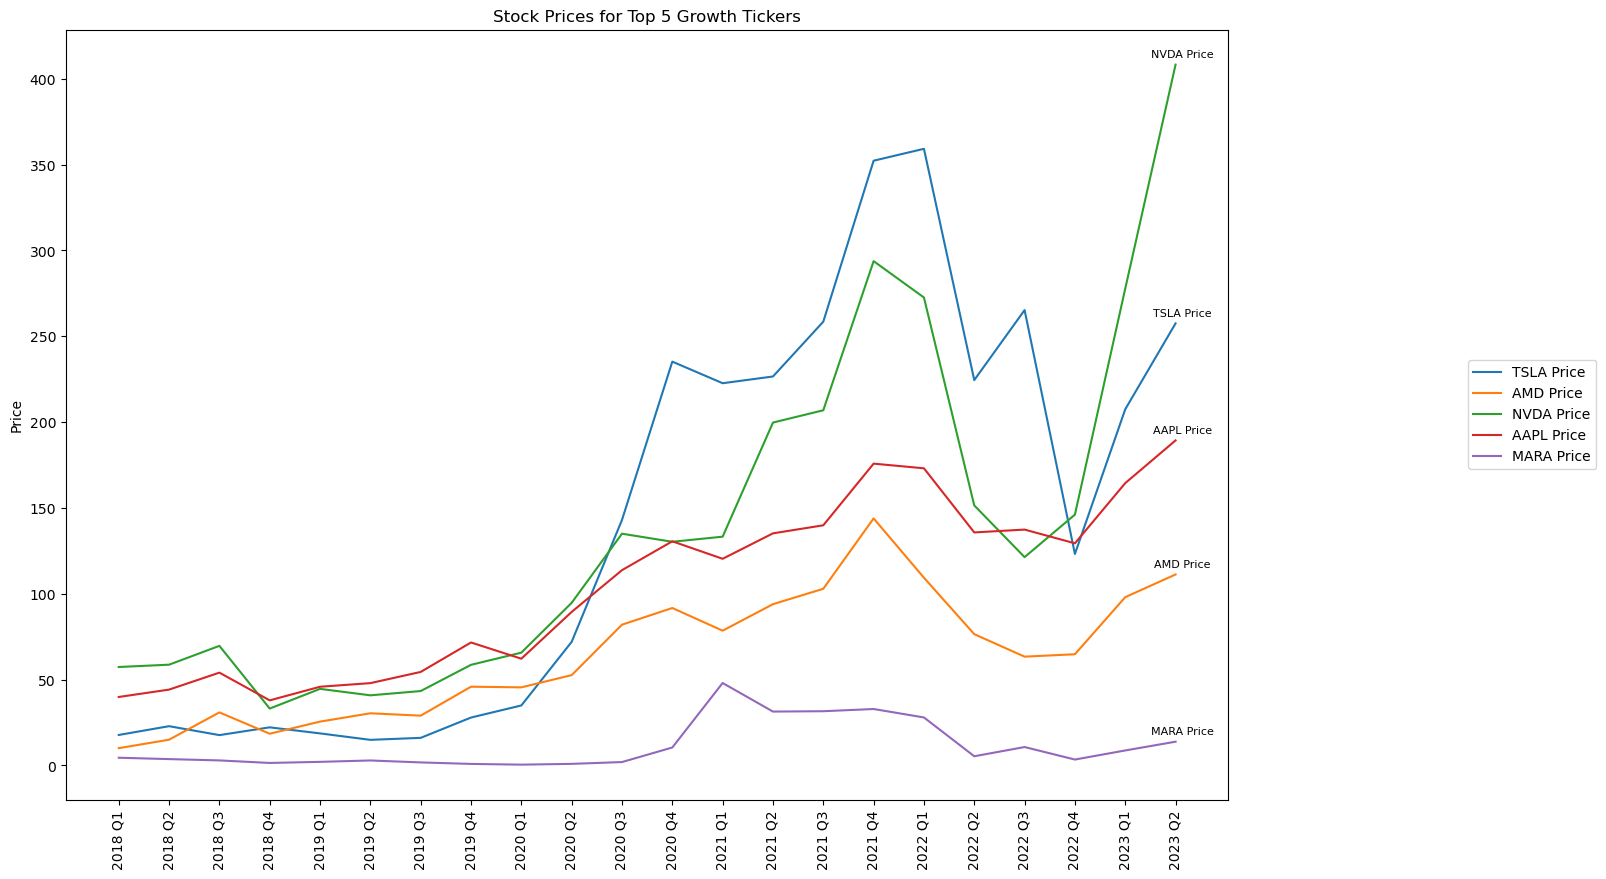

In [56]:
# Read the data
df = pd.read_csv('top_30_stock_asending.csv')

# Compute growth rate for each ticker
growth = {}
for ticker in df.columns:
    initial_price = df[ticker].iloc[0]
    final_price = df[ticker].iloc[-1]
    growth_rate = (final_price - initial_price) / initial_price
    if growth_rate > 0:  # Only consider positive growth rates
        growth[ticker] = growth_rate

# Sort tickers by growth rate and get top 5
top_5_tickers = sorted(growth, key=growth.get, reverse=True)[:5]

# Set figure size
plt.figure(figsize=(15, 10))

# Plot only the top 5 tickers
for ticker in top_5_tickers:
    plt.plot(df[ticker], label=ticker)
    
    # Annotate the last point with a smaller font size
    y_last = df[ticker].iloc[-1]  # Gets the y-coordinate of the last point
    plt.annotate(ticker, (len(df)-1, y_last), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)



# Define the quarters
quarters = [
    '2018 Q1', '2018 Q2', '2018 Q3', '2018 Q4', '2019 Q1', '2019 Q2', 
    '2019 Q3', '2019 Q4', '2020 Q1', '2020 Q2', '2020 Q3', '2020 Q4', 
    '2021 Q1', '2021 Q2', '2021 Q3', '2021 Q4', '2022 Q1', '2022 Q2', 
    '2022 Q3', '2022 Q4', '2023 Q1', '2023 Q2'
]

# Set x-ticks and x-labels
plt.xticks(range(len(quarters)), quarters, rotation=90)

# Add labels, title, and legend
plt.ylabel('Price')
plt.title('Stock Prices for Top 5 Growth Tickers')
plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))

# Display the plot
plt.show()


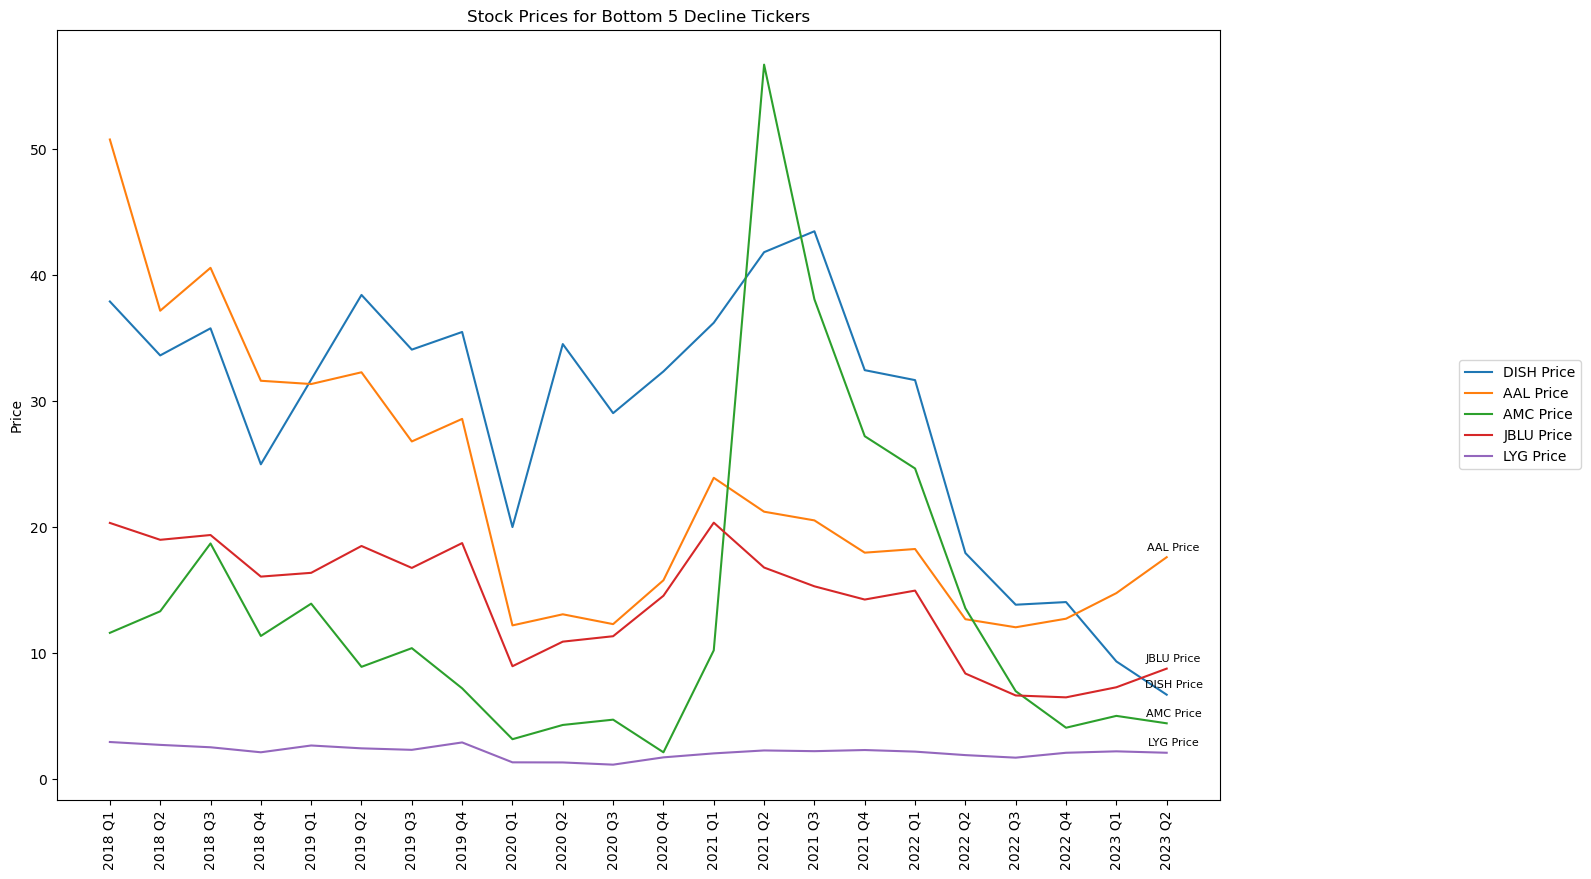

In [51]:
# Read the data
df = pd.read_csv('top_30_stock_asending.csv')

# Compute decline rate for each ticker
decline = {}
for ticker in df.columns:
    initial_price = df[ticker].iloc[0]
    final_price = df[ticker].iloc[-1]
    decline_rate = (final_price - initial_price) / initial_price
    if decline_rate < 0:  # Only consider negative decline rates
        decline[ticker] = decline_rate

# Sort tickers by decline rate and get bottom 5
bottom_5_tickers = sorted(decline, key=decline.get)[:5]  

# Set figure size
plt.figure(figsize=(15, 10))

# Plot only the bottom 5 tickers
for ticker in bottom_5_tickers:
    plt.plot(df[ticker], label=ticker)
    
    # Annotate the last point with a smaller font size
    y_last = df[ticker].iloc[-1]  # Gets the y-coordinate of the last point
    plt.annotate(ticker, (len(df)-1, y_last), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)

# Define the quarters
quarters = [
    '2018 Q1', '2018 Q2', '2018 Q3', '2018 Q4', '2019 Q1', '2019 Q2', 
    '2019 Q3', '2019 Q4', '2020 Q1', '2020 Q2', '2020 Q3', '2020 Q4', 
    '2021 Q1', '2021 Q2', '2021 Q3', '2021 Q4', '2022 Q1', '2022 Q2', 
    '2022 Q3', '2022 Q4', '2023 Q1', '2023 Q2'
]

# Set x-ticks and x-labels
plt.xticks(range(len(quarters)), quarters, rotation=90)

# Add labels, title, and legend
plt.ylabel('Price')
plt.title('Stock Prices for Bottom 5 Decline Tickers')
plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))

# Display the plot
plt.show()


# Q3: What is the average age of officers of these companies?

In [45]:
# Example tickers
top_30_tickers =[
    "PLTR", "TLRY", "TSLA", "LCID", "AAPL", "NIO", 
    "AMD", "AMZN", "RIVN", "F", "BAC", "T",
    "MPW", "NVDA", "AMC", "INTC", "ITUB", "JNJ", 
    "VALE", "SOFI", "MARA", "DDOG", "LYG", "DISH",
    "AAL", "OPEN", "SWN", "PFE", "HPE", "JBLU"
]

# Lists to store data
company_names = []
officer_ages = []

for ticker in top_30_tickers:
    company_info = yf.Ticker(ticker).info
    
    company_name = company_info.get('longName', ticker)
    company_officers = company_info.get('companyOfficers', [])
    
    current_officer_ages = []

    for officer in company_officers:
        # Check if 'age' key exists for the current officer
        if 'age' in officer:
            current_officer_ages.append(officer['age'])

    # Append the data to our lists
    company_names.append(company_name)
    officer_ages.append(current_officer_ages)

# Convert data to DataFrame
df = pd.DataFrame({
    'Company Name': company_names,
    'Officer Ages': officer_ages
})

print(df)

# Export DataFrame to a CSV file
df.to_csv('officer_ages.csv', index=False)



                          Company Name                          Officer Ages
0           Palantir Technologies Inc.  [55, 55, 38, 37, 39, 39, 39, 38, 73]
1                  Tilray Brands, Inc.                      [64, 52, 56, 49]
2                          Tesla, Inc.                  [50, 41, 44, 43, 46]
3                    Lucid Group, Inc.                      [63, 48, 54, 48]
4                           Apple Inc.                  [61, 59, 58, 58, 55]
5                             NIO Inc.              [48, 49, 41, 58, 52, 53]
6         Advanced Micro Devices, Inc.          [52, 62, 60, 52, 59, 56, 59]
7                     Amazon.com, Inc.          [58, 54, 58, 58, 55, 55, 57]
8              Rivian Automotive, Inc.          [38, 40, 39, 53, 49, 53, 54]
9                   Ford Motor Company  [65, 60, 56, 56, 57, 59, 56, 52, 52]
10         Bank of America Corporation      [63, 53, 55, 62, 57, 50, 50, 48]
11                           AT&T Inc.  [59, 58, 52, 53, 56, 43, 43, 70, 50]

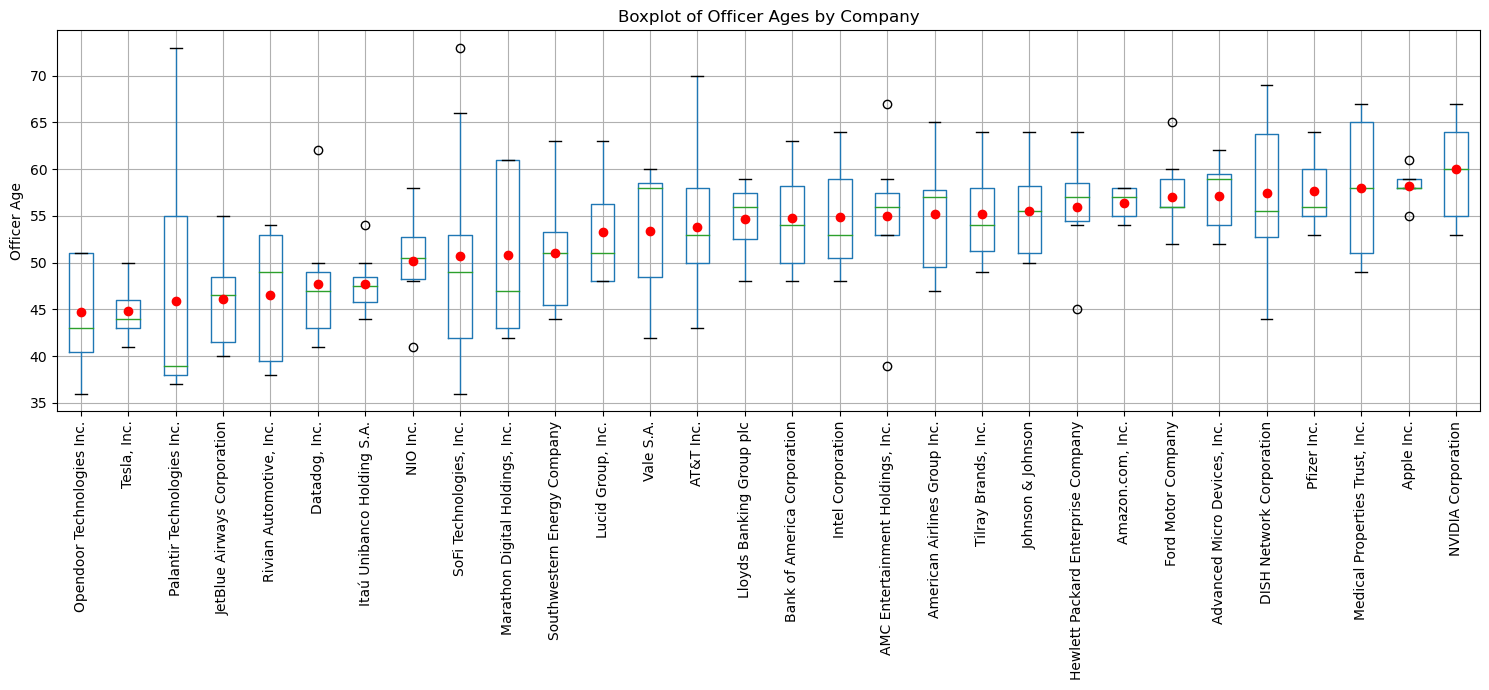

In [46]:
# Dictionary to store data
data_dict = {}

for ticker in top_30_tickers:
    company_info = yf.Ticker(ticker).info
    
    company_name = company_info.get('longName', ticker)
    company_officers = company_info.get('companyOfficers', [])
    
    current_officer_ages = []

    for officer in company_officers:
        # Check if 'age' key exists for the current officer
        if 'age' in officer:
            current_officer_ages.append(officer['age'])

    # Append the data to our dictionary
    data_dict[company_name] = current_officer_ages

# Convert data to DataFrame
df = pd.DataFrame.from_dict(data_dict, orient='index').transpose()

# Compute mean age for each company
mean_ages = df.mean()

# Sort columns based on mean age
sorted_columns = mean_ages.sort_values(ascending=True).index.tolist()
df = df[sorted_columns]

# Plot the data
plt.figure(figsize=(15, 7))
df.boxplot(showmeans=True, meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"red"})
plt.xticks(rotation=90)
plt.ylabel('Officer Age')
plt.title('Boxplot of Officer Ages by Company')
plt.tight_layout()
plt.show()


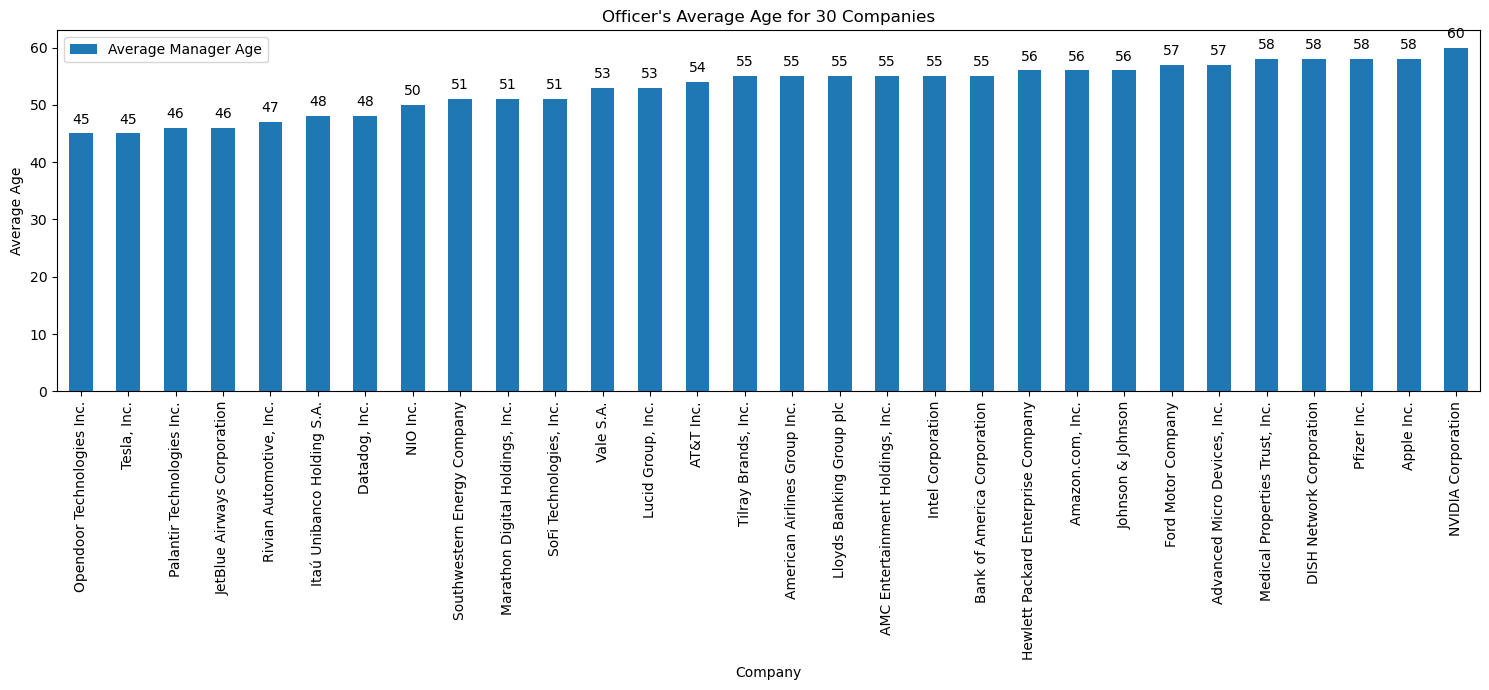

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV into a pandas DataFrame
df = pd.read_csv('top_30_df.csv')

# Assuming your columns are named 'Company' and 'Average Manager Age', you can plot directly
df.sort_values(by='Average Manager Age', ascending=True, inplace=True)

# Plot the bar chart
ax = df.plot(x='company', y='Average Manager Age', kind='bar', figsize=(15,7))

# Annotate each bar with its corresponding value
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 10),
                textcoords='offset points')

plt.title("Officer's Average Age for 30 Companies")
plt.ylabel('Average Age')
plt.xlabel('Company')
plt.xticks(rotation=90)  # Rotate company names for better readability
plt.tight_layout()  # This ensures that everything fits well
plt.show()


In [48]:
# Read the CSV into a pandas DataFrame
df = pd.read_csv('top_30_df.csv')

# Compute mean, median, and mode
mean_age = df['Average Manager Age'].mean()
median_age = df['Average Manager Age'].median()
mode_age = df['Average Manager Age'].mode()

print(f"Mean Age: {mean_age:.2f}")
print(f"Median Age: {median_age:.2f}")
print(f"Mode Age: {mode_age.values[0] if not mode_age.empty else 'No mode'}")  # mode() returns a Series, so we extract the first value


Mean Age: 53.07
Median Age: 55.00
Mode Age: 55
